In [ ]:
#This source code was inspired by Metin Karatas's book Developing AI Applications.
#It implements a machine learning model to classify the Iris dataset and includes
#enhancements for graphical display, allowing for better visualization of 
#the classification results

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Constants
# Path to the dataset
DATA_PATH = "C:/Users/adaml/Documents/iris5.csv"  
# Feature names for plotting
FEATURE_NAMES = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']  
# Target names for classification
TARGET_NAMES = ["setosa", "versicolor", "virginica"]  

# "the answer to the ultimate question of life, the universe, and everything," 
# from Douglas Adams' book The Hitchhiker's Guide to the Galaxy
RANDOM_STATE = 42  # Seed for reproducibility when splitting the dataset

In [3]:

# Load the dataset
# Read the CSV file into a DataFrame
data = pd.read_csv(DATA_PATH)  
#data = pd.read_csv(DATA_PATH,delimiter=',')  

In [4]:
print(data.head()) #LAD

   sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
print(data) #LAD

     sepal.length  sepal.width  petal.length  petal.width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [6]:
print(data['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [7]:
# Transform 'species' column to numeric codes
# Convert species names to numeric codes
data['species'] = data['species'].astype('category').cat.codes  

# Prepare data for training
X = data.drop(columns=['species'])  # Features: drop the target column
y = data['species']                 # Target: the species column
# Split data into training and testing
train_data, test_data, train_col, test_col = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)  


In [9]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8


In [10]:
# Build and train the model
# Building the Artificial Neural Network (ANN)
#coding dynamically sets the input dimension using X.shape[1]
#Uses ReLU (Rectified Linear Unit) for the hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X.shape[1]),  # First hidden layer
    tf.keras.layers.Dense(64, activation='relu'),                        # Second hidden layer
    tf.keras.layers.Dense(len(TARGET_NAMES), activation='softmax')  # Output layer with softmax for multi-class classification
]) #The output layer has 3 nodes!


#Note Switching from sigmoid to ReLU -> above
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(32, activation=tf.nn.sigmoid,input_dim=shape[1]),
#    tf.keras.layers.Dense(64, activation=tf.nn.sigmoid),
#    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
#])


# Compile the model
# Configure the learning process
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Add early stopping to avoid overfitting
# Stop training if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  

# Train the model with a validation split
# 30runs
model.fit(train_data, train_col, epochs=30, validation_split=0.2, callbacks=[early_stopping])  


Epoch 1/30
3/3 [==============================] - 0s 43ms/step - loss: 0.4201 - accuracy: 0.9375 - val_loss: 0.4733 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 0s 16ms/step - loss: 0.4098 - accuracy: 0.9583 - val_loss: 0.4649 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 0s 22ms/step - loss: 0.4022 - accuracy: 0.9583 - val_loss: 0.4626 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 21ms/step - loss: 0.3936 - accuracy: 0.9583 - val_loss: 0.4466 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 20ms/step - loss: 0.3828 - accuracy: 0.9583 - val_loss: 0.4345 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 21ms/step - loss: 0.3737 - accuracy: 0.9583 - val_loss: 0.4259 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 21ms/step - loss: 0.3659 - accuracy: 0.9583 - val_loss: 0.4129 - val_accuracy: 1.0000
Epoch 8/30
3/3 [===========

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_col)  # Evaluate performance
print(f'Test accuracy: {test_acc:.2f}')  # Print test accuracy

1/1 [==============================] - 0s 51ms/step - loss: 0.2542 - accuracy: 0.9333
Test accuracy: 0.93


In [ ]:
#Visualization attempt

5/5 [==============================] - 0s 0s/step


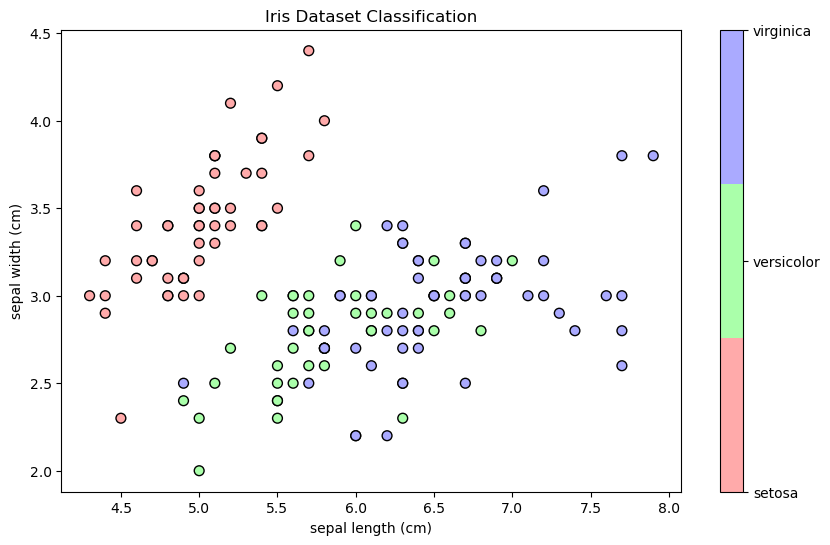

In [16]:
# Generate predictions for the entire dataset
predictions = model.predict(X)  # Get model predictions
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Plotting the results
plt.figure(figsize=(10, 6))  # Set the figure size
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Define a colormap for different classes
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predicted_classes, cmap=cmap_light, edgecolor='k', s=50)  # Scatter plot

# Add a color bar with the correct labels
plt.colorbar(ticks=np.unique(predicted_classes)).ax.set_yticklabels(TARGET_NAMES)  # Label color bar with target names

# Set labels and title using feature names
plt.xlabel(FEATURE_NAMES[0])  # X-axis label
plt.ylabel(FEATURE_NAMES[1])  # Y-axis label
plt.title('Iris Dataset Classification')  # Plot title
plt.show()  # Display the plot